In [1]:
import csv

with open('/home/todorcevicm/Documents/praksa/archive/netflix_titles.csv', 'r', encoding = 'utf8') as netflix_titles:
    reader = csv.reader(netflix_titles, delimiter=',')
    listed_in = []
    
    i = 0

    for row in reader:
        #if row[1] == "TV Show":
        if row[1] == "Movie":
        #if i < 10:
         #   listed_in.append(row[10])
          #  i += 1
            listed_in.append(row[10])    
        

    listed_in.remove(listed_in[0])

In [2]:
#print(listed_in)

In [3]:
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
#for genres in listed_in:
    #print(genres)

In [5]:
genre_genre_count = {}

for row in listed_in: 
    genres = row.split(', ')
    for genre in genres:
        #print(genre)
        if genre in genre_genre_count: 
            genre_genre_count[genre] += [not_this_genre for not_this_genre in genres if not genre == not_this_genre]
        else: 
            genre_genre_count[genre] = [not_this_genre for not_this_genre in genres if not genre == not_this_genre]

In [6]:
#print(genre_genre_count)

In [7]:
gg_count = {}

for genre, genres in genre_genre_count.items(): 
    gg_count[genre] = {}
    for g in genres:
        #print(f"{genre} is with {g}")
        if g in gg_count[genre]:
            gg_count[genre][g] += 1
        else: 
            gg_count[genre][g] = 1

In [8]:
from itertools import islice

In [9]:
gg_count_sorted = {}

for genre, genres in gg_count.items():
    gg_count_sorted[genre] = dict(sorted(genres.items(), key = lambda x: x[1], reverse = True))

In [10]:
gg_count_output = {}

for genre in gg_count_sorted.keys():
    gg_count_output[genre] = dict(list(gg_count_sorted[genre].items())[0: 3])

In [11]:
#print(gg_count)
#print(gg_count_sorted['Crime TV Shows'])
#print(list(gg_count_sorted.values())[0:5])
#print(gg_count_sorted)
print(gg_count_output)

{'Children & Family Movies': {'Comedies': 270, 'Dramas': 89, 'Music & Musicals': 38}, 'Dramas': {'International Movies': 1483, 'Independent Movies': 588, 'Comedies': 502}, 'Independent Movies': {'Dramas': 588, 'International Movies': 292, 'Comedies': 194}, 'International Movies': {'Dramas': 1483, 'Comedies': 804, 'Action & Adventure': 398}, 'Comedies': {'International Movies': 804, 'Dramas': 502, 'Romantic Movies': 277}, 'Documentaries': {'International Movies': 296, 'Music & Musicals': 126, 'Sports Movies': 114}, 'Thrillers': {'International Movies': 272, 'Dramas': 256, 'Horror Movies': 126}, 'Romantic Movies': {'International Movies': 372, 'Dramas': 308, 'Comedies': 277}, 'Music & Musicals': {'International Movies': 184, 'Documentaries': 126, 'Comedies': 91}, 'Horror Movies': {'International Movies': 135, 'Thrillers': 126, 'Independent Movies': 55}, 'Sci-Fi & Fantasy': {'Action & Adventure': 125, 'International Movies': 51, 'Dramas': 42}, 'Action & Adventure': {'International Movies'

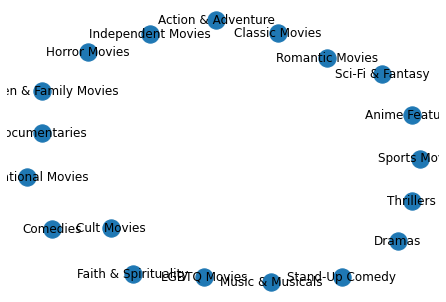

In [12]:
G = nx.Graph()
G.add_nodes_from(gg_c for gg_c in gg_count_output.keys() if gg_c != "TV Shows" and gg_c != "Movies")
nx.draw(G, with_labels = True)

In [13]:

genre_sum = {}

for genre, genres in gg_count_output.items(): 
    #print(genre)    
    
    for g, c in genres.items():
        if genre in genre_sum:
            genre_sum[genre] += c
        else:
            genre_sum[genre] = c
        

In [14]:
#print(genre_sum['TV Mysteries'])

In [15]:
for genre, genres in gg_count_output.items(): 
    #print(genre)    
    
    for g, c in genres.items():
        #if c > 100:
            #print(c)
        G.add_weighted_edges_from([(genre, g, (c / genre_sum[genre]))])

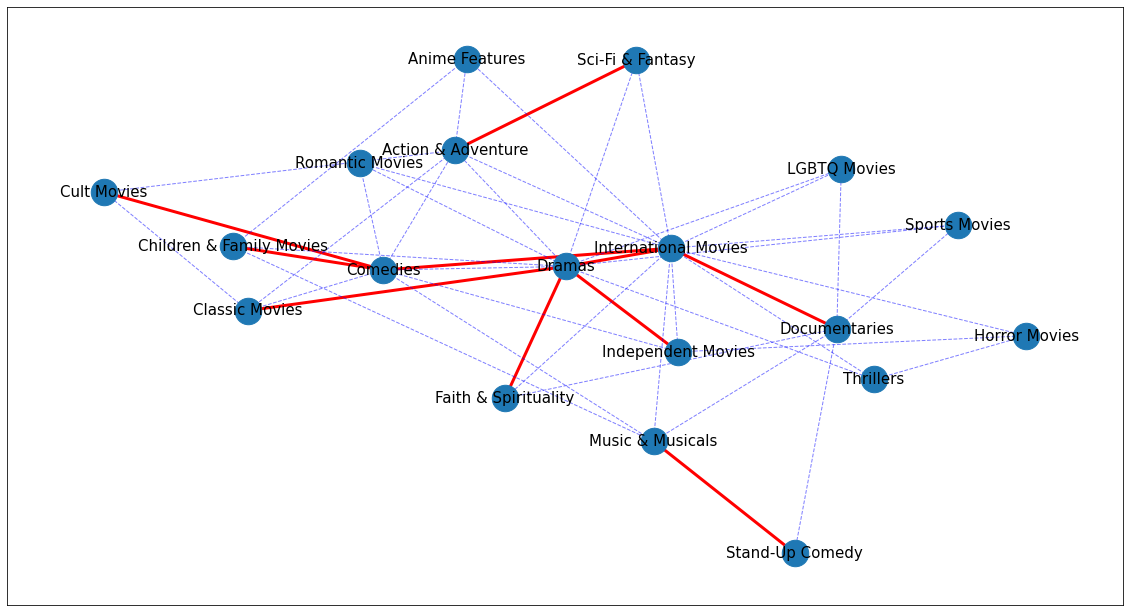

In [16]:
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size = 700)

# edges
nx.draw_networkx_edges(G, pos, edgelist = elarge, width = 3, edge_color = "r")
nx.draw_networkx_edges(G, pos, edgelist = esmall, width = 1, alpha = 0.5, edge_color = "b", style = "dashed")

# labels
nx.draw_networkx_labels(G, pos, font_size = 15, font_family = "sans-serif")

fig = plt.gcf()
fig.set_size_inches(20, 11)
#plt.savefig("path.png")
plt.show()